In [ ]:
# Importar librerias
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
# StandardScaler(): Normaliza los datos restando el promedio y dividiendo sobre la desviación estándar en cada variable (Z-Score).
from sklearn.preprocessing import StandardScaler,LabelEncoder

# libreria para Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
#Montar google drive para guardar la informacion
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)
root_dir = "/content/gdrive/My Drive"
import os
base_dir = "/content/gdrive/MyDrive/Classroom/2024-2 - Viernes - Analítica y Procesamiento de Datos Institución Universitaria Pascual Bravo/"
print(base_dir)

Mounted at /content/gdrive
/content/gdrive/MyDrive/Classroom/2024-2 - Viernes - Analítica y Procesamiento de Datos Institución Universitaria Pascual Bravo/


# **Ejemplo 1: Dataset Pacientes2.csv**

In [ ]:
# Cargar dataset Pacientes2 desde el google Drive

print(base_dir)

Pacientes = pd.read_csv(base_dir + "Pacientes2.csv")

Pacientes.head()

/content/gdrive/MyDrive/Classroom/2024-2 - Viernes - Analítica y Procesamiento de Datos Institución Universitaria Pascual Bravo/


,NOEXPED,Enfermedad,HIPERTEN,HIPERGLU,HDLBAJA,HIPERTRI,CINTALTA,EDAD,GENERO,FUMA,ALCOHOL,POLIURIA
0,1,NO,0,0,1,0,0,38,0,0,0,0
1,2,SI,0,1,1,1,1,49,1,0,0,0
2,3,SI,1,1,0,1,1,59,1,0,0,1
3,4,NO,1,1,0,0,0,44,0,0,0,0
4,5,NO,0,0,1,0,0,42,0,0,0,0


In [ ]:
#Convertimos la columna numero de expediente en el index
Pacientes = Pacientes.set_index('NOEXPED')
Pacientes

,Enfermedad,HIPERTEN,HIPERGLU,HDLBAJA,HIPERTRI,CINTALTA,EDAD,GENERO,FUMA,ALCOHOL,POLIURIA
NOEXPED,,,,,,,,,,,
1,NO,0,0,1,0,0,38,0,0,0,0
2,SI,0,1,1,1,1,49,1,0,0,0
3,SI,1,1,0,1,1,59,1,0,0,1
4,NO,1,1,0,0,0,44,0,0,0,0
5,NO,0,0,1,0,0,42,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
890,SI,1,1,1,0,0,70,1,0,0,0
892,NO,0,0,0,0,0,39,0,0,0,0
904,NO,1,0,1,1,0,45,0,0,1,0


In [ ]:
# Ver informacion de las variables
Pacientes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 985 entries, 1 to 909
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Enfermedad  985 non-null    object
 1   HIPERTEN    985 non-null    int64 
 2   HIPERGLU    985 non-null    int64 
 3   HDLBAJA     985 non-null    int64 
 4   HIPERTRI    985 non-null    int64 
 5   CINTALTA    985 non-null    int64 
 6   EDAD        985 non-null    int64 
 7   GENERO      985 non-null    int64 
 8   FUMA        985 non-null    int64 
 9   ALCOHOL     985 non-null    int64 
 10  POLIURIA    985 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 92.3+ KB


In [ ]:
# Ver informacion de las variables
Pacientes.dtypes

,0
Enfermedad,object
HIPERTEN,int64
HIPERGLU,int64
HDLBAJA,int64
HIPERTRI,int64
CINTALTA,int64
EDAD,int64
GENERO,int64
FUMA,int64
ALCOHOL,int64


In [ ]:
# Ver estadisticos descriptivos de las variables numericas

Pacientes.describe()

,HIPERTEN,HIPERGLU,HDLBAJA,HIPERTRI,CINTALTA,EDAD,GENERO,FUMA,ALCOHOL,POLIURIA
count,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000
mean,0.210152,0.257868,0.563452,0.308629,0.515736,43.393909,0.344162,0.234518,0.241624,0.036548
std,0.407624,0.437683,0.496209,0.462162,0.500006,12.193859,0.475336,0.423912,0.428285,0.187745
min,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,38.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.000000,1.000000,45.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,1.000000,1.000000,50.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,79.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
Pacientes.columns
#['HIPERTEN','HIPERGLU','HDLBAJA','HIPERTRI','CINTALTA','EDAD','GENERO',
#          'FUMA', 'ALCOHOL', 'POLIURIA']

columnas_numericas = Pacientes.select_dtypes(include=['number'])

# Calcular la varianza de las columnas numéricas
columnas_numericas.var()

,0
HIPERTEN,0.166157
HIPERGLU,0.191567
HDLBAJA,0.246224
HIPERTRI,0.213594
CINTALTA,0.250006
EDAD,148.690207
GENERO,0.225944
FUMA,0.179702
ALCOHOL,0.183428
POLIURIA,0.035248


In [ ]:
# Separamos el conjunto de Datos de variables independientes dejando el segmento del mercado por fuera
x = Pacientes.iloc[:,1:11] #Variables independientes
y = Pacientes.iloc[:,0]  #Variables Dependientes Enfermedad (Respuesta)
print(x)
print(y)

         HIPERTEN  HIPERGLU  HDLBAJA  HIPERTRI  CINTALTA  EDAD  GENERO  FUMA  \
NOEXPED                                                                        
1               0         0        1         0         0    38       0     0   
2               0         1        1         1         1    49       1     0   
3               1         1        0         1         1    59       1     0   
4               1         1        0         0         0    44       0     0   
5               0         0        1         0         0    42       0     0   
...           ...       ...      ...       ...       ...   ...     ...   ...   
890             1         1        1         0         0    70       1     0   
892             0         0        0         0         0    39       0     0   
904             1         0        1         1         0    45       0     0   
954             1         0        1         0         0    41       0     0   
909             1         0        0    

In [ ]:
# Se crea el conteo de datos para la variable categorica y para ver si estan desbalanceados los datos
Agrupado=(Pacientes.groupby("Enfermedad")
          .agg(Frecuencia_Abs=("Enfermedad", "count"))
          .reset_index())

print(Agrupado)

# Para este caso se observa que los datos estan desbalanceados dado que hay mas NO que SI

  Enfermedad  Frecuencia_Abs
0         NO             689
1         SI             296


In [ ]:
# Dividimos los datos en el conjunto de entrenamiento y el conjunto de pruebas con la funcion train_test_split
# 80% entrenamiento, 20% prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)
print('X_train')
print(X_train)
print('\n X_test')
print(X_test)
print('\n y_train')
print(y_train)
print('\n y_test')
print(y_test)

X_train
         HIPERTEN  HIPERGLU  HDLBAJA  HIPERTRI  CINTALTA  EDAD  GENERO  FUMA  \
NOEXPED                                                                        
494             0         0        0         1         0    42       1     0   
242             0         1        0         1         1    42       0     0   
238             1         0        1         0         1    44       0     0   
121             0         1        1         1         1    40       1     0   
397             0         0        1         0         0    19       0     0   
...           ...       ...      ...       ...       ...   ...     ...   ...   
431             1         1        1         0         1    60       0     1   
306             0         0        1         0         0    19       0     0   
938             0         0        0         1         0    46       1     0   
861             0         0        0         1         0    38       0     0   
28              0         1     

In [ ]:
# Utilicemos un Arbol de decision para realizar la clasificacion
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

# Importamos las Librerias para ejecutar el modelo del Arbol de decision
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Se Nombra el modelo y se crea un arbol con profundidad de 4
# Muchos modelos en scikit-learn tienen un parámetro class_weight que puedes ajustar
# a balanced para que el modelo tenga en cuenta el desbalanceo de clases.

model_names=['DecisionTreeClassifier']
Arbol_Enfermedad = DecisionTreeClassifier(class_weight="balanced", max_depth=4)

# Se entrena el Modelo
Arbol_Enfermedad.fit(X_train,y_train)

# Prediccion del modelo con datos entredados
predict_train = Arbol_Enfermedad.predict(X_train)

# Prediccion del modelo con datos no entrenados
predict_test = Arbol_Enfermedad.predict(X_test)

# Contemos el numero de elementos
print(y_train.count())
print('\n')

# Cuantos elementos se tienen de cada uno
freq = y_train.value_counts()
print(freq)
print('\n')


# Se puede ver que los datos estan desbalanceados dado que hay mas NO que SI

788


Enfermedad
NO    539
SI    249
Name: count, dtype: int64




In [ ]:
# Exactitud del modelo
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
acc=[]
eval_acc={}
acc.append(accuracy_score(predict_train,y_train))
eval_acc={'Modelling Algorithm':model_names,'Accuracy':acc}
eval_acc

{'Modelling Algorithm': ['DecisionTreeClassifier'],
 'Accuracy': [0.9035532994923858]}

In [ ]:
# Se construye la metrica Matriz de Confusion con los datos de entrenamiento
from sklearn.metrics import confusion_matrix
print('Matriz de Confusion')
print(confusion_matrix(y_train,predict_train))
print('\n')

# Metricas matriz de confusion
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(y_train,predict_train))
print('\n')

Matriz de Confusion
[[470  69]
 [  7 242]]


              precision    recall  f1-score   support

          NO       0.99      0.87      0.93       539
          SI       0.78      0.97      0.86       249

    accuracy                           0.90       788
   macro avg       0.88      0.92      0.89       788
weighted avg       0.92      0.90      0.91       788





In [ ]:
# Se construye la metrica Matriz de Confusion con los datos de prueba
# Contemos el numero de elementos
print(y_test.count())
print('\n')

# Cuantos elementos se tienen de cada uno
freq = y_test.value_counts()
print(freq)
print('\n')

from sklearn.metrics import confusion_matrix
print('Matriz de Confusion')
print(confusion_matrix(y_test,predict_test))
print('\n')

# Metricas matriz de confusion
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(y_test,predict_test))
print('\n')


197


Enfermedad
NO    150
SI     47
Name: count, dtype: int64


Matriz de Confusion
[[130  20]
 [  0  47]]


              precision    recall  f1-score   support

          NO       1.00      0.87      0.93       150
          SI       0.70      1.00      0.82        47

    accuracy                           0.90       197
   macro avg       0.85      0.93      0.88       197
weighted avg       0.93      0.90      0.90       197





In [ ]:
# Exactitud del modelo
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
acc=[]
eval_acc={}
acc.append(accuracy_score(predict_test,y_test))
eval_acc={'Modelling Algorithm':model_names,'Accuracy':acc}
eval_acc

{'Modelling Algorithm': ['DecisionTreeClassifier'],
 'Accuracy': [0.8984771573604061]}

# **Si se entrena el Modelo con un modelo balanceado veamos que sucede**

In [ ]:
model_names=['DecisionTreeClassifier_bal']
Arbol_Enfermedad_bal = DecisionTreeClassifier(max_depth=4)

# Se entrena el Modelo
Arbol_Enfermedad_bal.fit(X_train,y_train)

# Prediccion del modelo con datos entredados
predict_train_bal = Arbol_Enfermedad_bal.predict(X_train)

# Prediccion del modelo con datos no entrenados
predict_test_bal = Arbol_Enfermedad_bal.predict(X_test)


from sklearn.metrics import confusion_matrix
print('Matriz de Confusion Entrenamiento Balanceado')
print(confusion_matrix(y_train,predict_train_bal))
print('\n')

# Metricas matriz de confusion
from sklearn.metrics import classification_report,confusion_matrix
print('Metricas matriz de confusion Balanceado')
print(classification_report(y_train,predict_train_bal))
print('\n')


from sklearn.metrics import confusion_matrix
print('Matriz de Confusion Prueba Balanceado')
print(confusion_matrix(y_test,predict_test_bal))
print('\n')

# Metricas matriz de confusion
from sklearn.metrics import classification_report,confusion_matrix
print('Metricas matriz de confusion Balanceado')
print(classification_report(y_test,predict_test_bal))

# Se ve que al balancear el modelo se mejora la deteccion pero el no pierde presicion

# Al balancear el modelo se ve que se genera cambios drásticos

Matriz de Confusion Entrenamiento Balanceado
[[534   5]
 [ 50 199]]


Metricas matriz de confusion Balanceado
              precision    recall  f1-score   support

          NO       0.91      0.99      0.95       539
          SI       0.98      0.80      0.88       249

    accuracy                           0.93       788
   macro avg       0.94      0.89      0.91       788
weighted avg       0.93      0.93      0.93       788



Matriz de Confusion Prueba Balanceado
[[146   4]
 [  7  40]]


Metricas matriz de confusion Balanceado
              precision    recall  f1-score   support

          NO       0.95      0.97      0.96       150
          SI       0.91      0.85      0.88        47

    accuracy                           0.94       197
   macro avg       0.93      0.91      0.92       197
weighted avg       0.94      0.94      0.94       197



In [ ]:
# Exactitud del modelo
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
acc=[]
eval_acc={}
acc.append(accuracy_score(predict_train_bal,y_train))
eval_acc={'Modelling Algorithm train':model_names,'Accuracy':acc}
eval_acc

{'Modelling Algorithm train': ['DecisionTreeClassifier_bal'],
 'Accuracy': [0.9302030456852792]}

In [ ]:
# Exactitud del modelo balanceado
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
acc=[]
eval_acc={}
acc.append(accuracy_score(predict_test_bal,y_test))
eval_acc={'Modelling Algorithm test':model_names,'Accuracy':acc}
eval_acc

{'Modelling Algorithm test': ['DecisionTreeClassifier_bal'],
 'Accuracy': [0.9441624365482234]}

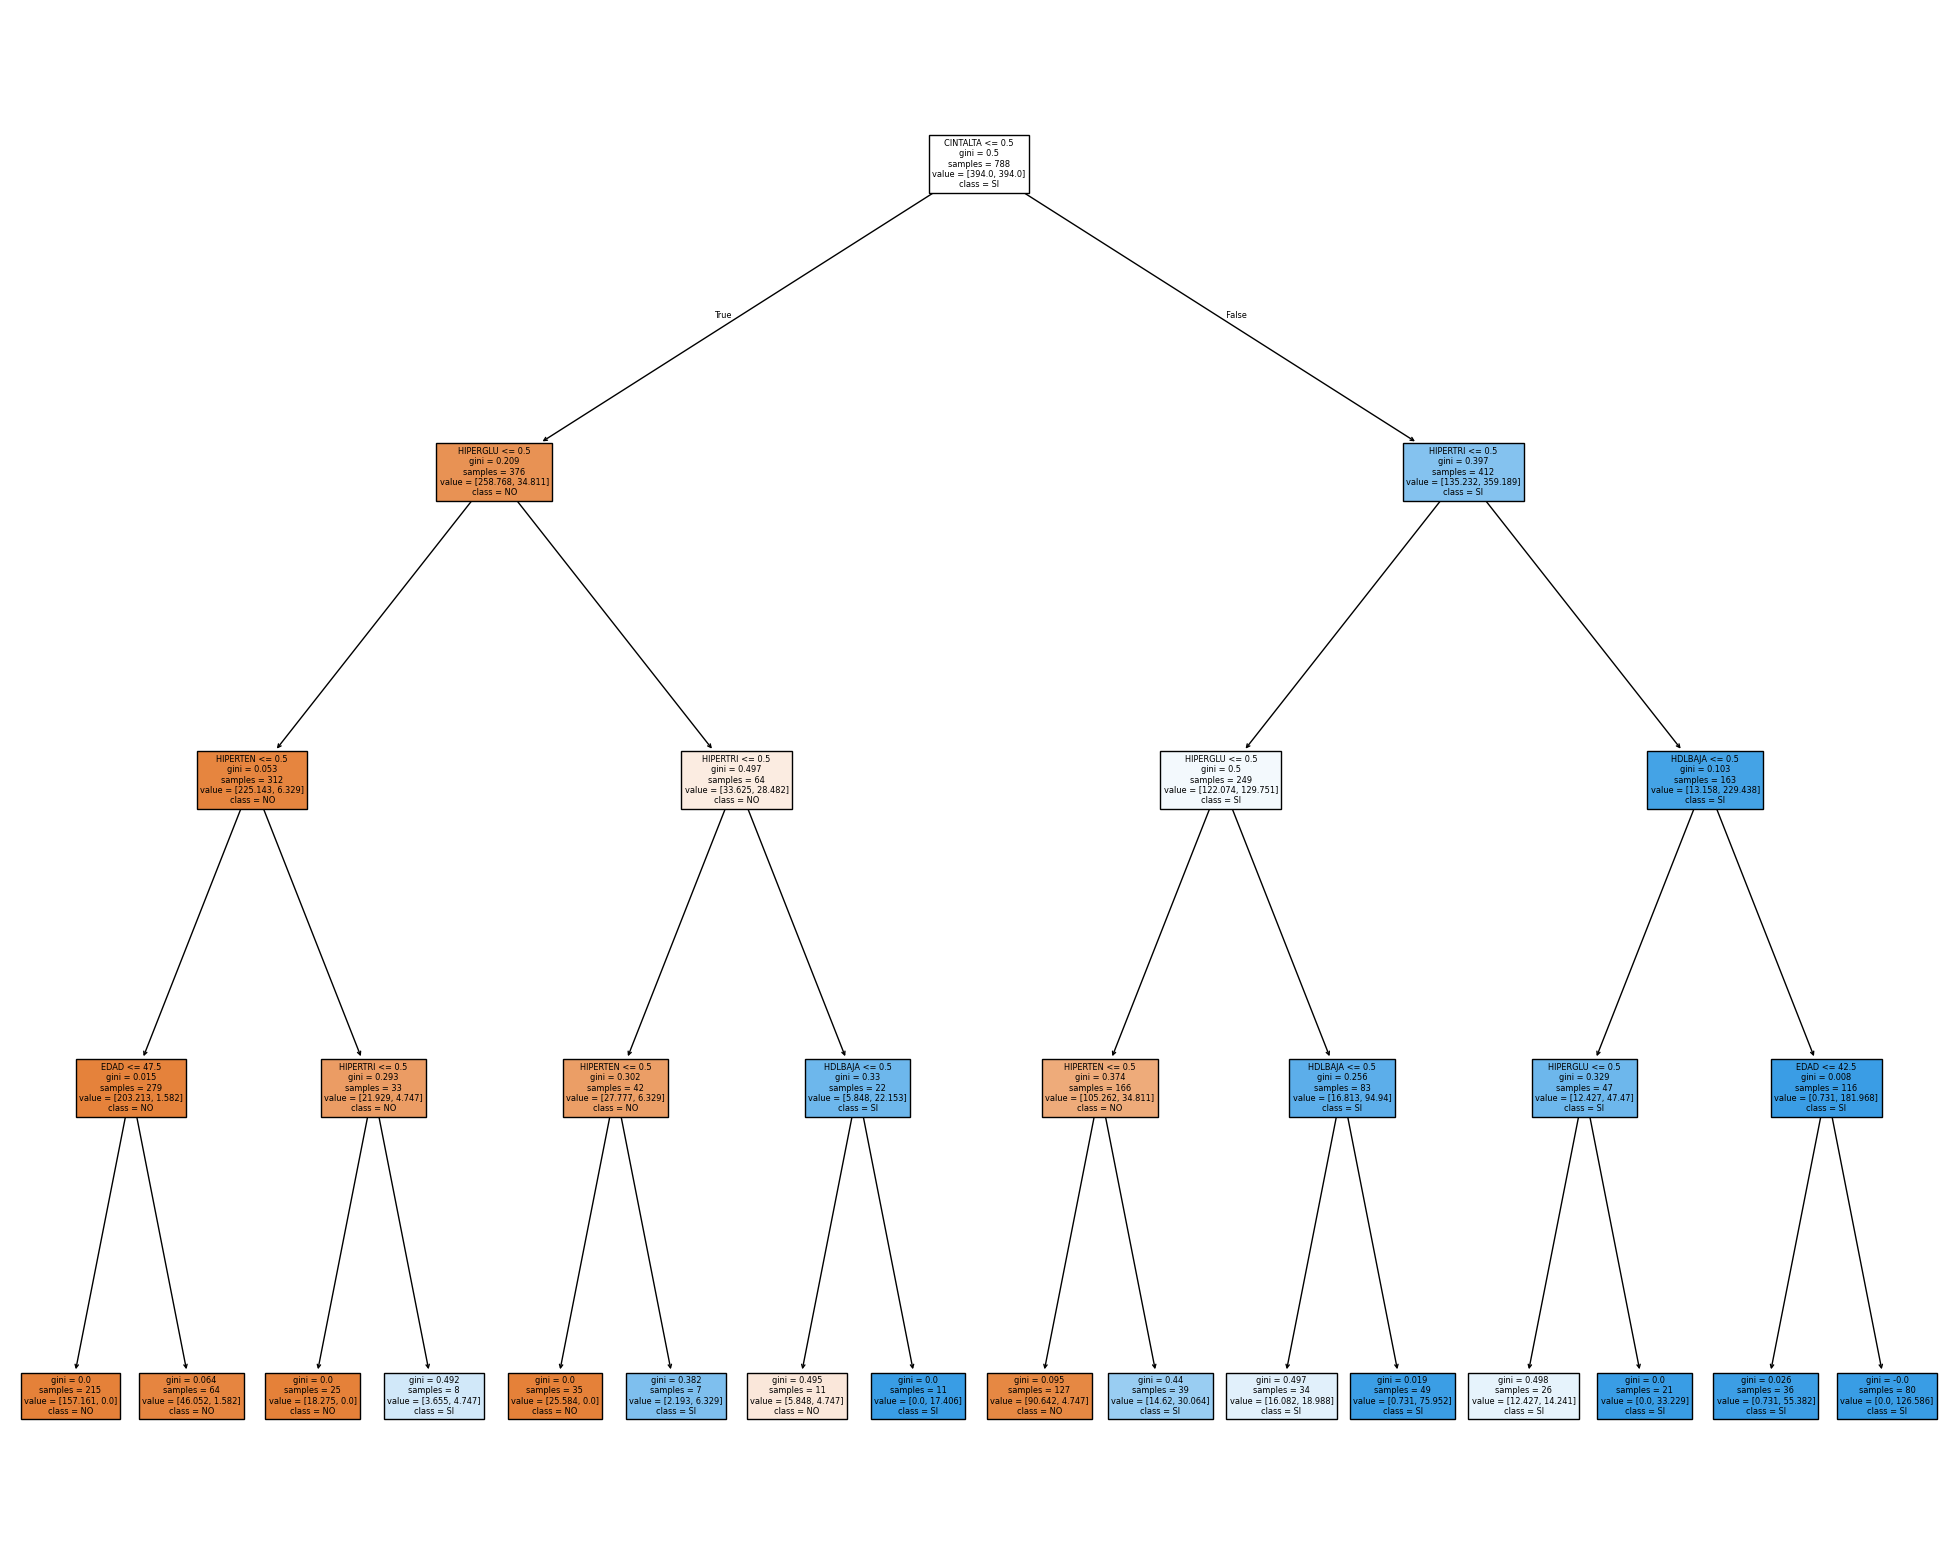

In [ ]:
# Se Construye la grafica del arbol de decision

fig = plt.figure(figsize=(25,20))
tree.plot_tree(Arbol_Enfermedad,feature_names=list(Pacientes.iloc[:,1:11].columns.values),class_names=(Pacientes.iloc[:,0].values),filled=True)
plt.show()

## Si Estandarizamos los datos de entrenamiento y prueba

In [ ]:
# Estandarizamos los datos de entrenamiento y prueba
from sklearn.preprocessing import StandardScaler
scaler_Enfermedad = StandardScaler()
X_train_sc = scaler_Enfermedad.fit_transform(X_train)
X_test_sc = scaler_Enfermedad.fit_transform(X_test)
X_train_sc
X_test_sc

array([[-0.47286624, -0.48886983,  0.85327028, ..., -0.63807747,
        -0.54410719, -0.23124865],
       [ 2.11476292, -0.48886983, -1.17196159, ..., -0.63807747,
         1.83787317, -0.23124865],
       [-0.47286624, -0.48886983,  0.85327028, ..., -0.63807747,
        -0.54410719, -0.23124865],
       ...,
       [ 2.11476292,  2.04553429,  0.85327028, ...,  1.56720782,
        -0.54410719, -0.23124865],
       [-0.47286624, -0.48886983, -1.17196159, ...,  1.56720782,
         1.83787317, -0.23124865],
       [-0.47286624, -0.48886983, -1.17196159, ..., -0.63807747,
        -0.54410719, -0.23124865]])

In [ ]:
# Arbol de decision para Variables categoricas
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
model_names=['DecisionTreeClassifier']
Arbol_1_Enfermedad = DecisionTreeClassifier(max_depth=5)
# Entrenamiento del Modelo
Arbol_1_Enfermedad.fit(X_train_sc,y_train)
#prediccion del modelo
predict_1_train = Arbol_1_Enfermedad.predict(X_train_sc)
predict_1_test = Arbol_1_Enfermedad.predict(X_test_sc)

In [ ]:
_# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,predict_1_test))

[[147   3]
 [  0  47]]


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predict_1_test))

              precision    recall  f1-score   support

          NO       1.00      0.98      0.99       150
          SI       0.94      1.00      0.97        47

    accuracy                           0.98       197
   macro avg       0.97      0.99      0.98       197
weighted avg       0.99      0.98      0.98       197



In [ ]:
# Exactitud del modelo
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
acc=[]
eval_acc={}
acc.append(accuracy_score(predict_1_test,y_test))
eval_acc={'Modelling Algorithm':model_names,'Accuracy whith scaler':acc}
eval_acc

{'Modelling Algorithm': ['DecisionTreeClassifier'],
 'Accuracy whith scaler': [0.9847715736040609]}

# **Ejemplo 2: Dataset pacientes_cardiacos.csv**

In [ ]:
#Leer un archivo desde el google Drive

print(base_dir)

cardiacos = pd.read_csv(base_dir + "pacientes_cardiacos.csv", sep=";")

print(cardiacos.head())
print('\n')

cardiacos1 =cardiacos.replace({1: 'SI', 0: 'NO'})

cardiacos1

/content/gdrive/MyDrive/Classroom/2024-2 - Viernes - Analítica y Procesamiento de Datos Institución Universitaria Pascual Bravo/
   edad  colesterol  problema_cardiaco
0    63         233                  1
1    37         250                  1
2    41         204                  1
3    56         236                  1
4    57         354                  1




,edad,colesterol,problema_cardiaco
0,63,233,SI
1,37,250,SI
2,41,204,SI
3,56,236,SI
4,57,354,SI
...,...,...,...
295,63,187,NO
296,63,197,NO
297,59,176,NO
298,57,241,NO


In [ ]:
cardiacos1.dtypes

,0
edad,int64
colesterol,int64
problema_cardiaco,object


In [ ]:
cardiacos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   edad               300 non-null    int64
 1   colesterol         300 non-null    int64
 2   problema_cardiaco  300 non-null    int64
dtypes: int64(3)
memory usage: 7.2 KB


In [ ]:
# Separamos el conjunto de Datos de variables independientes dejando el segmento del mercado por fuera
x1 = cardiacos1.iloc[:,0:2] #Variables independientes
y1 = cardiacos1.iloc[:,2]  #Variables Dependientes Enfermedad
print('Variables independientes')
print(x1)
print('\n Variables Dependientes Enfermedad')
print(y1)

Variables independientes
     edad  colesterol
0      63         233
1      37         250
2      41         204
3      56         236
4      57         354
..    ...         ...
295    63         187
296    63         197
297    59         176
298    57         241
299    45         264

[300 rows x 2 columns]

 Variables Dependientes Enfermedad
0      SI
1      SI
2      SI
3      SI
4      SI
       ..
295    NO
296    NO
297    NO
298    NO
299    NO
Name: problema_cardiaco, Length: 300, dtype: object


In [ ]:
# Dividimos los datos en el conjunto de entrenamiento y el conjunto de pruebas con la funcion train_test_split
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test=train_test_split(x1,y1,test_size=0.2,random_state=0)
print('X1_train')
print(X1_train)
print('\n X1_test')
print(X1_test)
print('\n y1_train')
print(y1_train)
print('\n y1_test')
print(y1_test)

In [ ]:
# Arbol de decision para Variables categoricas
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
model_names=['DecisionTreeClassifier']
Problemas_Cardiacos = DecisionTreeClassifier(max_depth=4)
# Entrenamiento del Modelo
Problemas_Cardiacos.fit(X1_train,y1_train)
#prediccion del modelo
predict1_train = Problemas_Cardiacos.predict(X1_train)
predict1_test = Problemas_Cardiacos.predict(X1_test)

In [ ]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
tree.plot_tree(Problemas_Cardiacos,feature_names=list(cardiacos1.iloc[:,0:2].columns.values),class_names=(cardiacos1.iloc[:,2].values),filled=True)
plt.show()

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y1_test,predict1_test))

[[20  8]
 [12 20]]


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y1_test,predict1_test))

              precision    recall  f1-score   support

          NO       0.62      0.71      0.67        28
          SI       0.71      0.62      0.67        32

    accuracy                           0.67        60
   macro avg       0.67      0.67      0.67        60
weighted avg       0.67      0.67      0.67        60



In [ ]:
# Exactitud del modelo
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
acc=[]
eval_acc={}
acc.append(accuracy_score(predict1_test,y1_test))
eval_acc={'Modelling Algorithm':model_names,'Accuracy':acc}
eval_acc

{'Modelling Algorithm': ['DecisionTreeClassifier'],
 'Accuracy': [0.6666666666666666]}

## Si Estandarizamos los datos de entrenamiento y prueba

In [ ]:
# Estandarizamos los datos de entrenamiento y prueba
from sklearn.preprocessing import StandardScaler
scaler_cardiaco = StandardScaler()
X_train_sc1 = scaler_cardiaco.fit_transform(X1_train)
X_test_sc1 = scaler_cardiaco.fit_transform(X1_test)

In [ ]:
# Arbol de decision para Variables categoricas
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
model_names=['DecisionTreeClassifier']
Arbol_1_cardiaco = DecisionTreeClassifier(max_depth=4)
# Entrenamiento del Modelo
Arbol_1_cardiaco.fit(X_train_sc1,y1_train)
#prediccion del modelo
predict_1_train_1 = Arbol_1_cardiaco.predict(X_train_sc1)
predict_1_test_1 = Arbol_1_cardiaco.predict(X_test_sc1)

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y1_test,predict_1_test_1))

[[18 10]
 [15 17]]


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y1_test,predict_1_test_1))


              precision    recall  f1-score   support

          NO       0.55      0.64      0.59        28
          SI       0.63      0.53      0.58        32

    accuracy                           0.58        60
   macro avg       0.59      0.59      0.58        60
weighted avg       0.59      0.58      0.58        60



In [ ]:
# Exactitud del modelo
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
acc=[]
eval_acc={}
acc.append(accuracy_score(predict_1_test_1,y1_test))
eval_acc={'Modelling Algorithm':model_names,'Accuracy whith scaler':acc}
eval_acc

{'Modelling Algorithm': ['DecisionTreeClassifier'],
 'Accuracy whith scaler': [0.5833333333333334]}

# **Ejemplo 3: Dataset comprar_alquilar.csv**

In [ ]:
print(base_dir)

comprar_alquilar = pd.read_csv(base_dir + "comprar_alquilar.csv")

comprar_alquilar.head()

/content/gdrive/MyDrive/Classroom/2024-2 - Viernes - Analítica y Procesamiento de Datos Institución Universitaria Pascual Bravo/


,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,comprar
0,6000,1000,0,600,50000,400000,0,2,2,1
1,6745,944,123,429,43240,636897,1,3,6,0
2,6455,1033,98,795,57463,321779,2,1,8,1
3,7098,1278,15,254,54506,660933,0,0,3,0
4,6167,863,223,520,41512,348932,0,0,3,1


In [ ]:
# Separamos el conjunto de Datos de variables independientes dejando el segmento del mercado por fuera
x = comprar_alquilar.iloc[:,0:9] #Variables independientes
y = comprar_alquilar.iloc[:,9]  #Variables Dependientes Enfermedad
print(x)
print(y)

     ingresos  gastos_comunes  pago_coche  gastos_otros  ahorros  vivienda  \
0        6000            1000           0           600    50000    400000   
1        6745             944         123           429    43240    636897   
2        6455            1033          98           795    57463    321779   
3        7098            1278          15           254    54506    660933   
4        6167             863         223           520    41512    348932   
..        ...             ...         ...           ...      ...       ...   
197      3831             690         352           488    10723    363120   
198      3961            1030         270           475    21880    280421   
199      3184             955         276           684    35565    388025   
200      3334             867         369           652    19985    376892   
201      3988            1157         105           382    11980    257580   

     estado_civil  hijos  trabajo  
0               0      2   

In [ ]:
# Dividimos los datos en el conjunto de entrenamiento y el conjunto de pruebas con la funcion train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=0)
print('X_train')
print(X_train)
print('\n X_test')
print(X_test)
print('\n y_train')
print(y_train)
print('\n y_test')
print(y_test)

X_train
     ingresos  gastos_comunes  pago_coche  gastos_otros  ahorros  vivienda  \
66       2032             569         348           513    17902    209280   
26       5294             688          71           725    48188    444817   
113      5862             762         249           334    40529    443477   
169      3641             837         186           627    27808    273334   
63       3105             559         318           690    31271    317379   
..        ...             ...         ...           ...      ...       ...   
67       3361            1008          63           746    25404    254237   
192      4653            1024         447           703    16952    392957   
117      6806            1361         320           437    40751    283936   
47       5536             720         174           285    49221    357007   
172      4276             941         390           728    11718    294150   

     estado_civil  hijos  trabajo  
66              2  

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_names=['RandomForestClassifier']
rf = RandomForestClassifier(n_estimators = 10,
            criterion    = 'gini',
            max_depth    = None,
            max_features = 'auto',
            oob_score    = False,
            n_jobs       = -1,
            random_state = 123)
# Entrenamiento del Modelo
rf.fit(X_train, y_train)
#prediccion del modelo
predict_rf_train = rf.predict(X_train)
predict_rf_test = rf.predict(X_test)


InvalidParameterError: The 'max_features' parameter of RandomForestClassifier must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'log2', 'sqrt'} or None. Got 'auto' instead.

In [ ]:
# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

# Export the first three decision trees from the forest

for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,
                               filled=True,
                               max_depth=2,
                               impurity=False,
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

AttributeError: 'RandomForestClassifier' object has no attribute 'estimators_'

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,predict_rf_test))

NameError: name 'predict_rf_test' is not defined

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predict_rf_test))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91        26
           1       1.00      0.67      0.80        15

    accuracy                           0.88        41
   macro avg       0.92      0.83      0.86        41
weighted avg       0.90      0.88      0.87        41

